<a href="https://colab.research.google.com/github/rahmanziaur/AdCryptoMS/blob/main/RSABasicsANDByteTest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import sys
message = 'Python is fun'

print("String:",message," length:",len(message)," Type:",type(message)," Size:" ,sys.getsizeof(message))

# Output: String: Python is fun length: 14 Type: <class 'str'>
# convert string to bytes
byte_message = bytes(message, 'utf-8')
print("byte_String:",byte_message," length:",len(byte_message)," Type:",type(byte_message)," Size:" ,sys.getsizeof(byte_message))

# Output: b'Python is fun'

String: Python is fun  length: 13  Type: <class 'str'>  Size: 62
byte_String: b'Python is fun'  length: 13  Type: <class 'bytes'>  Size: 46


In [5]:
# prompt: GCD OF two numbers

def gcd(a, b):
  if b == 0:
    return a
  return gcd(b, a % b)
a = 10
b = 15
print("gcd(",a,",",b,")=",gcd(a,b))
a = 35
b = 10
print("gcd(",a,",",b,")=",gcd(a,b))


gcd( 10 , 15 )= 5
gcd( 35 , 10 )= 5


In [ ]:
# prompt: extended eucledean algorithm proof example

def extended_gcd(a, b):
    """
    Extended Euclidean Algorithm to find the greatest common divisor (gcd)
    of two integers a and b, and coefficients x and y such that ax + by = gcd(a, b).
    """
    if a == 0:
        return (b, 0, 1)
    else:
        g, y, x = extended_gcd(b % a, a)
        return (g, x - (b // a) * y, y)

# Example usage and proof
a = 48
b = 18

g, x, y = extended_gcd(a, b)

print(f"gcd({a}, {b}) = {g}")
print(f"Coefficients: x = {x}, y = {y}")

# Proof: Verify that ax + by = gcd(a, b)
proof_result = (a * x) + (b * y)
print(f"Verification: {a} * {x} + {b} * {y} = {proof_result}")

assert proof_result == g, "Verification failed. The Extended Euclidean Algorithm result is incorrect."

print("Verification successful. The Extended Euclidean Algorithm result is correct.")

In [ ]:
# prompt: generating and counting number of coprime of a given number

def count_coprimes(n):
    """
    Counts the number of coprimes of a given number n.

    Args:
        n: The number for which to count coprimes.

    Returns:
        The number of coprimes of n.
    """
    count = 0
    for i in range(1, n + 1):
        if gcd(n, i) == 1:  # Check if gcd(n, i) is 1 (coprime condition)
            count += 1
    return count

In [10]:
from math import gcd

def coprimes_of_n(n):
    coprimes = []
    for i in range(1, n):
        if gcd(n, i) == 1:
            coprimes.append(i)
    return coprimes, len(coprimes)

# Example usage
n = 35
coprimes, count = coprimes_of_n(n)
print(f"Coprimes of {n}: {coprimes}")
print(f"Number of coprimes: {count}")


Coprimes of 35: [1, 2, 3, 4, 6, 8, 9, 11, 12, 13, 16, 17, 18, 19, 22, 23, 24, 26, 27, 29, 31, 32, 33, 34]
Number of coprimes: 24


In [9]:
def prime_factorization(n):
    """Returns the prime factorization of n as a dictionary {prime: exponent}."""
    factors = {} #dictionary
    i = 2
    # Divide by all numbers up to sqrt(n)
    while i * i <= n:
        while n % i == 0:
            if i in factors:
                factors[i] += 1
            else:
                factors[i] = 1
            n //= i
        i += 1
    # If n is still greater than 1, it's a prime number
    if n > 1:
        factors[n] = 1
    return factors

# Example usage
n = 27  # Large number
factors = prime_factorization(n)
print(f"Prime factorization of {n}: {factors}")


Prime factorization of 27: {3: 3}


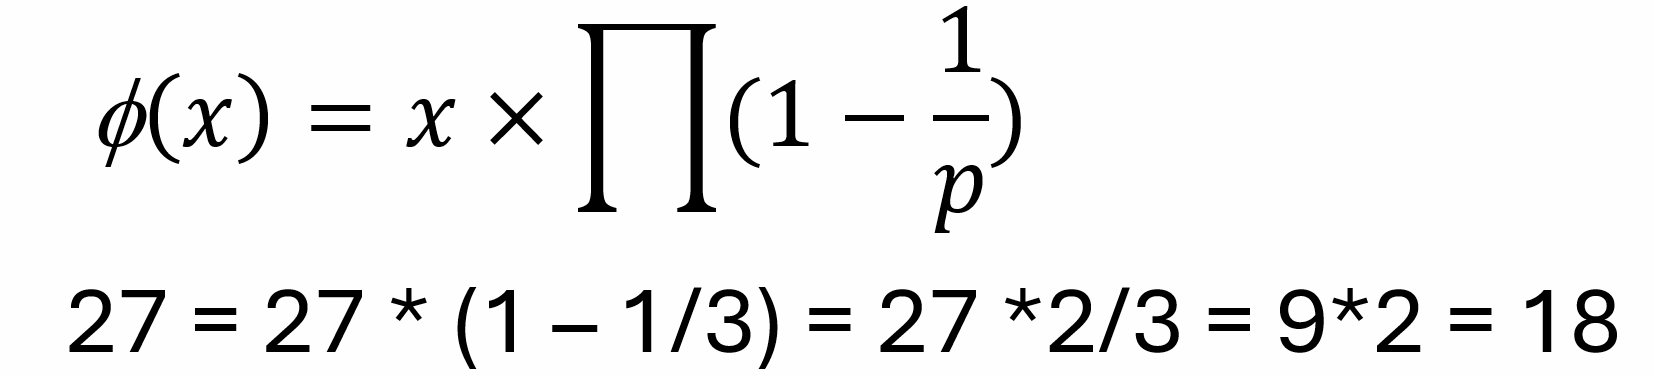

In [11]:
# prompt: write python to compute pow(a,Phi(n))

import sys
from math import gcd

def phi(n):
    result = n
    p = 2
    while p * p <= n:
        if n % p == 0:
            while n % p == 0:
                n //= p
            result -= result // p
        p += 1
    if n > 1:
        result -= result // n
    return result

def power(a, b, n):
    res = 1
    a %= n
    while b > 0:
        if b % 2 == 1:
            res = (res * a) % n
        a = (a * a) % n
        b //= 2
    return res

a = int(input())
n = int(input())
pn = phi(n)

print(power(a,pn,n))

22
35
1


In [16]:
from math import gcd
from sympy import mod_inverse  # To compute modular multiplicative inverse

def rsa_encrypt_decrypt(n, char):
    # Step 1: Generate two prime numbers p and q such that p * q = n
    # Note: In a real system, p and q are kept secret, but here we'll derive them.
    primes = [i for i in range(2, n) if all(i % j != 0 for j in range(2, int(i**0.5) + 1))]
    p, q = None, None
    for prime in primes:
        if n % prime == 0:
            p = prime
            q = n // prime
            break
    if not p or not q:
        return f"Error: n = {n} is not the product of two primes."

    # Step 2: Calculate φ(n) = (p - 1) * (q - 1)
    phi_n = (p - 1) * (q - 1)

    # Step 3: Choose e such that 1 < e < φ(n) and gcd(e, φ(n)) = 1
    e = 3  # A common small prime used for encryption
    while gcd(e, phi_n) != 1:
        e += 2

    # Step 4: Compute d, the modular multiplicative inverse of e mod φ(n)
    d = mod_inverse(e, phi_n)

    # Step 5: Convert the character to its ASCII value
    m = ord(char)

    # Ensure the message is within the range of n
    if m >= n:
        return f"Error: The character '{char}' has an ASCII value ({m}) larger than n ({n})."

    # Step 6: Encrypt the message: c = m^e mod n
    c = pow(m, e, n)

    # Step 7: Decrypt the message: m_decrypted = c^d mod n
    m_decrypted = pow(c, d, n)

    # Step 8: Convert the decrypted value back to a character
    decrypted_char = chr(m_decrypted)

    # Return the results
    return {
        "Original Character": char,
        "ASCII Value": m,
        "Public Key (e, n)": (e, n),
        "Private Key (d, n)": (d, n),
        "Encrypted Value (c)": c,
        "Decrypted ASCII Value": m_decrypted,
        "Decrypted Character": decrypted_char
    }

# Example usage:
try:
    n = int(input('Enter n (must be a product of two primes): '))
    if n < 4:
        print("Error: n must be at least the product of two primes (e.g., 6, 15, 21, etc.).")
    else:
        char = input('Enter a single character (English alphabet) as a message for RSA.i.e ASCII of CHar is less than n: ')
        if len(char) != 1:
            print("Error: Please enter a single character only.")
        else:
            result = rsa_encrypt_decrypt(n, char)
            if isinstance(result, str):
                print(result)  # Display errors
            else:
                for key, value in result.items():
                    print(f"{key}: {value}")
except ValueError:
    print("Error: Please enter valid numeric input for n.")


KeyboardInterrupt: Interrupted by user

In [17]:
from math import gcd
from sympy import mod_inverse  # To compute modular multiplicative inverse

def rsa_encrypt_decrypt(n, char):
    # Step 1: Generate two prime numbers p and q such that p * q = n
    # Note: In a real system, p and q are kept secret, but here we'll derive them.
    primes = [i for i in range(2, n) if all(i % j != 0 for j in range(2, int(i**0.5) + 1))]
    p, q = None, None
    for prime in primes:
        if n % prime == 0:
            p = prime
            q = n // prime
            break
    if not p or not q:
        return f"Error: n = {n} is not the product of two primes."

    # Step 2: Calculate φ(n) = (p - 1) * (q - 1)
    phi_n = (p - 1) * (q - 1)

    # Step 3: Choose e such that 1 < e < φ(n) and gcd(e, φ(n)) = 1
    e = 3  # A common small prime used for encryption
    while gcd(e, phi_n) != 1:
        e += 2

    # Step 4: Compute d, the modular multiplicative inverse of e mod φ(n)
    d = mod_inverse(e, phi_n)

    # Step 5: Convert the character to its ASCII value
    m = ord(char)

    # Ensure the message is within the range of n
    if m >= n:
        return f"Error: The character '{char}' has an ASCII value ({m}) larger than n ({n}). Please use a larger n."

    # Step 6: Encrypt the message: c = m^e mod n
    c = pow(m, e, n)

    # Step 7: Decrypt the message: m_decrypted = c^d mod n
    m_decrypted = pow(c, d, n)

    # Step 8: Convert the decrypted value back to a character
    decrypted_char = chr(m_decrypted)

    # Return the results
    return {
        "Original Character": char,
        "ASCII Value": m,
        "Public Key (e, n)": (e, n),
        "Private Key (d, n)": (d, n),
        "Encrypted Value (c)": c,
        "Decrypted ASCII Value": m_decrypted,
        "Decrypted Character": decrypted_char
    }

# Example usage:
try:
    n = int(input('Enter n (must be a product of two primes and greater than 128): '))
    if n < 128:
        print("Error: n must be greater than 128 to handle ASCII characters.")
    else:
        char = input('Enter a single character (English alphabet) as a message for RSA: ')
        if len(char) != 1:
            print("Error: Please enter a single character only.")
        else:
            result = rsa_encrypt_decrypt(n, char)
            if isinstance(result, str):
                print(result)  # Display errors
            else:
                for key, value in result.items():
                    print(f"{key}: {value}")
except ValueError:
    print("Error: Please enter valid numeric input for n.")


Enter n (must be a product of two primes and greater than 128): 209
Enter a single character (English alphabet) as a message for RSA: A
Original Character: A
ASCII Value: 65
Public Key (e, n): (7, 209)
Private Key (d, n): (103, 209)
Encrypted Value (c): 65
Decrypted ASCII Value: 65
Decrypted Character: A
